In [1]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


In [2]:
import jieba

text = "我愛打羽球，也喜歡看NBA比賽。"

# Cut into words
words = jieba.lcut(text, cut_all=True)
print("Segmented words:", words)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\jieba\_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.504 seconds.
Prefix dict has been built successfully.


Segmented words: ['我', '愛', '打', '羽球', '，', '也', '喜', '歡', '看', 'NBA', '比', '賽', '。']


In [ ]:
# Add Custom Words
jieba.add_word('大模型')
jieba.add_word('AIGC')

text = "大模型和AIGC是當前王道"
print(jieba.lcut(text))

# Load Custom Dictionary
# jieba.load_userdict("mydict.txt")

['大模型', '和', 'AIGC', '是', '當前', '王道']


In [4]:
import jieba
import re

stop_words = {
    '的', '了', '是', '在', '我', '有', '和', '就', '不', '都', '一', '一個', '上', '也', '很',
    '到', '說', '要', '去', '你', '會', '著', '看', '這', '那', '他', '她', '它', '們', '為',
    '能', '個', '可以', '什麼', '怎麼', '這麼', '哪裡', '時候', '覺得', '因為', '所以',
    '但是', '如果', '就', '還是', '還是', '還是', '嗎', '吧', '呢', '啊', '呀'
}


def clean_chinese_text(text, stop_words=stop_words):
    # Step 1: Remove English letters (a-z, A-Z) and words
    text = re.sub(r'[a-zA-Z]+', '', text)
    
    # Step 2: Remove numbers (0-99, 100, etc.)
    text = re.sub(r'\d+', '', text)
    
    # Step 3: Remove punctuation (common Chinese & English punctuation)
    # You can customize this list
    punctuation = r"[，。！？；：""''（）【】《》、·…\-\s]+"
    text = re.sub(punctuation, ' ', text)
    
    # Step 4: Use jieba to segment text into words
    words = jieba.lcut(text)
    
    # Step 5: Filter words
    cleaned_words = [
        word for word in words
        if word not in stop_words      # Remove stop words
        and len(word) > 1              # Remove single characters (optional)
        and not re.match(r'^\s*$', word)  # Remove whitespace
    ]
    
    # Return as list of words, or join into clean text
    return cleaned_words  # or ' '.join(cleaned_words)

raw_text = """
我昨天買了3個蘋果和2瓶可樂，花了199元！
This is a test message with English words like AI and deep learning.
我覺得這個價格還可以，但是下次還是去超市買比較好。
#優惠 #促銷
"""

# Keep only Chinese characters (Unicode range)
words = jieba.lcut(text)
cleaned = [w for w in words if w.strip() and w not in stop_words]
cleaned = clean_chinese_text(raw_text)
print("Cleaned words:", cleaned)

Cleaned words: ['昨天', '蘋果', '可樂', '我覺', '這個', '價格還', '下次', '超市', '優惠', '促銷']


<>:21: SyntaxWarning: invalid escape sequence '\-'
<>:21: SyntaxWarning: invalid escape sequence '\-'
C:\Users\user\AppData\Local\Temp\ipykernel_21420\999512063.py:21: SyntaxWarning: invalid escape sequence '\-'
  punctuation = r"[，。！？；：""''（）【】《》、·…\-\s]+"


In [5]:
from collections import Counter

# Simulate more text (like from news or user input)
long_text = """
我愛打籃球，也喜歡看NBA比賽。籃球比賽非常精彩，球員技術高超。
Taiwan男籃正在備戰亞洲杯，希望取得好成績。
"""

words = jieba.lcut(long_text)
filtered_words = [w for w in words if w not in stop_words and len(w) > 1]

# Count frequency
word_freq = Counter(filtered_words)
print("Top words:", word_freq.most_common(5))

Top words: [('籃球', 2), ('比賽', 2), ('我愛打', 1), ('喜歡', 1), ('NBA', 1)]


In [12]:
import matplotlib.font_manager as fm

# List all fonts and filter those likely supporting Chinese
chinese_fonts = [f.name for f in fm.fontManager.ttflist if any(kw in f.name.lower() for kw in ['hei', 'song', 'kai', 'fang', 'noto', 'ming', 'msyh'])]
print("Available Chinese-capable fonts:")
for font in sorted(set(chinese_fonts)):
    print(font)

Available Chinese-capable fonts:
DFKai-SB
Microsoft JhengHei
Microsoft YaHei
MingLiU
MingLiU-ExtB


 Using font: Microsoft YaHei
Segmented & cleaned words: ['我愛打', '籃球', '籃球', '比賽', '非常', '精彩', '世界', '最好', '籃球', '聯賽', '喜歡', '湖人隊', '勇士', '比賽', '球員技術', '高超', '配合默契', '男籃', '正在', '努力', '提升', '水準']

Top 10 most frequent words:
籃球: 3
比賽: 2
我愛打: 1
非常: 1
精彩: 1
世界: 1
最好: 1
聯賽: 1
喜歡: 1
湖人隊: 1


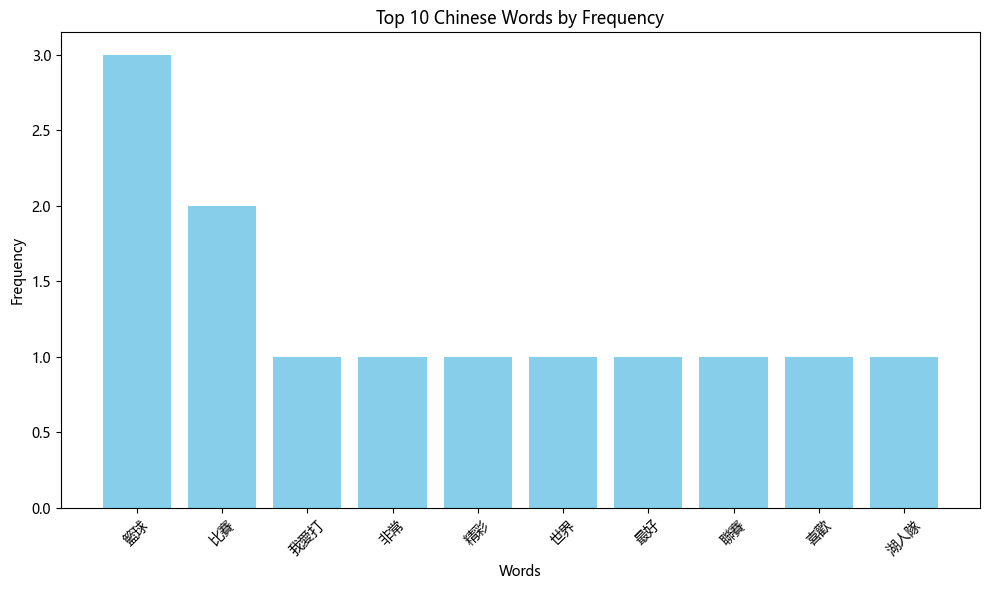

In [13]:
import jieba
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import matplotlib.font_manager as fm

# --- Auto-detect Chinese font ---
def get_chinese_font():
    possible_fonts = [
        'Microsoft YaHei',
        'SimHei',
        'PingFang TC',
        'PingFang SC',
        'Noto Sans CJK TC',
        'Noto Sans CJK SC',
        'FangSong',
        'KaiTi'
    ]
    available_fonts = set(f.name for f in fm.fontManager.ttflist)
    for font in possible_fonts:
        if font in available_fonts:
            return font
    # Fallback: use first available font containing 'Hei' or 'Song'
    for f in fm.fontManager.ttflist:
        if any(kw in f.name for kw in ['Hei', 'Song', 'YaHei', 'PingFang', 'Noto']):
            return f.name
    return None  # If none found, may still fail

# Set font
chinese_font = get_chinese_font()
if chinese_font:
    plt.rcParams['font.sans-serif'] = [chinese_font]
    plt.rcParams['axes.unicode_minus'] = False
    print(f" Using font: {chinese_font}")
else:
    print("No suitable Chinese font found. May not display correctly.")

# --- Your existing code ---
stop_words = {
    '的', '了', '是', '在', '我', '有', '和', '就', '不', '都', '一', '一個', '上', '也', '很',
    '到', '說', '要', '去', '你', '會', '著', '看', '這', '那', '他', '她', '它', '們', '為',
    '能', '個', '可以', '什麼', '怎麼', '這麼', '哪裡', '時候', '覺得', '因為', '所以',
    '但是', '如果', '嗎', '吧', '呢', '啊', '呀', '了', '啦', '哦'
}

def clean_and_segment(text):
    text = re.sub(r'[a-zA-Z0-9]+', '', text)  # Remove digits and English
    text = re.sub(r'[^\u4e00-\u9fa5]', ' ', text)  # Keep only Chinese chars
    words = jieba.lcut(text)
    filtered_words = [
        word for word in words
        if word not in stop_words
        and len(word) > 1
        and word.strip()
    ]
    return filtered_words

text = """
我愛打籃球，籃球比賽非常精彩！NBA是世界上最好的籃球聯賽。
我喜歡看湖人隊和勇士隊的比賽，球員技術高超，配合默契。
Taiwan男籃正在努力提升水準。
"""

words = clean_and_segment(text)
print("Segmented & cleaned words:", words)

word_freq = Counter(words)
print("\nTop 10 most frequent words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# Plot bar chart
top_words = word_freq.most_common(10)
words_only = [item[0] for item in top_words]
counts = [item[1] for item in top_words]

plt.figure(figsize=(10, 6))
plt.bar(words_only, counts, color='skyblue')
plt.title('Top 10 Chinese Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Prevent label cutoff
plt.show() 

In [23]:
import jieba
from collections import Counter
import pandas as pd

# Sample Chinese text
text = """
自然語言處理是人工智慧的重要分支，它讓電腦能夠理解、分析和生成人類語言。
近年來，隨著深度學習的發展，自然語言處理在機器翻譯、情感分析、問答系統等領域取得了顯著進展。
中文文本處理尤其具有挑戰性，因為中文沒有明顯的詞邊界，需要先進行分詞。
自然語言處理的應用非常廣泛，包括智慧客服、搜尋引擎、語音助手等。
"""

# Step 1: Segment text using jieba
words = jieba.lcut(text)

# Step 2: Optional — Filter out stopwords (you can load a custom list)
# Here’s a minimal stopword list for demo
stopwords = {'的', '是', '在', '和', '等', '、', '，', '。', '隨著', '因為', '需要', '先', '它', '讓', '了', '非常'}

# Filter out stopwords and single-character tokens (optional, to reduce noise)
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# Step 3: Count term frequencies
term_freq = Counter(filtered_words)

# Step 4: Display top 10 most frequent terms
print("=== Top 10 Term Frequencies ===")
top_terms = term_freq.most_common(10)

for term, freq in top_terms:
    print(f"{term}: {freq}")

# Optional: Convert to DataFrame for better visualization
df = pd.DataFrame(top_terms, columns=['Term', 'Frequency'])
print("\n=== As DataFrame ===")
print(df)

=== Top 10 Term Frequencies ===
語言: 4
處理: 4
自然: 3
分析: 2
中文: 2
人工智慧: 1
重要: 1
分支: 1
電腦: 1
能夠: 1

=== As DataFrame ===
   Term  Frequency
0    語言          4
1    處理          4
2    自然          3
3    分析          2
4    中文          2
5  人工智慧          1
6    重要          1
7    分支          1
8    電腦          1
9    能夠          1


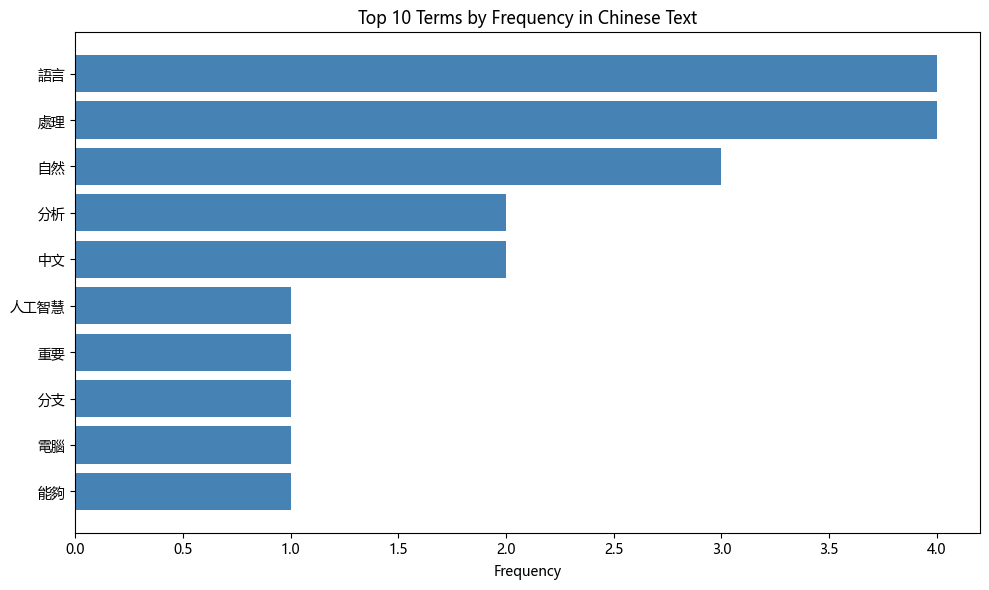

In [24]:
import matplotlib.pyplot as plt

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Term'][::-1], df['Frequency'][::-1], color='steelblue')
plt.xlabel('Frequency')
plt.title('Top 10 Terms by Frequency in Chinese Text')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Simulate 3 short "documents" (e.g., news articles)
docs = [
    "我愛籃球 NBA比賽精彩 球員厲害",
    "足球是世界第一運動 梅西是天才",
    "Taiwan籃球運動員努力"
]

# Segment each document
segmented_docs = []
for doc in docs:
    words = jieba.lcut(doc)
    cleaned = " ".join([w for w in words if w not in stop_words])
    segmented_docs.append(cleaned)

print("Processed docs:", segmented_docs)

# apply TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(segmented_docs)

# Show feature names and TF-IDF values
print("Features:", vectorizer.get_feature_names_out())
print("TF-IDF shape:", X.shape)  # (3 docs, N features)
print("TF-IDF matrix:\n", X.toarray())

Processed docs: ['愛籃球   NBA 比賽 精彩   球員 厲害', '足球 世界 第一 運動   梅西 天才', 'Taiwan 籃球 運動員 努力']
Features: ['nba' 'taiwan' '世界' '努力' '厲害' '天才' '愛籃球' '梅西' '比賽' '球員' '第一' '籃球' '精彩'
 '足球' '運動' '運動員']
TF-IDF shape: (3, 16)
TF-IDF matrix:
 [[0.40824829 0.         0.         0.         0.40824829 0.
  0.40824829 0.         0.40824829 0.40824829 0.         0.
  0.40824829 0.         0.         0.        ]
 [0.         0.         0.40824829 0.         0.         0.40824829
  0.         0.40824829 0.         0.         0.40824829 0.
  0.         0.40824829 0.40824829 0.        ]
 [0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.5
  0.         0.         0.         0.5       ]]


In [26]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

docs = [
    "我愛打籃球，NBA比賽非常精彩，湖人隊和勇士隊對決。",
    "Taiwan男籃正在努力提升水準。",
    "人工智慧是未來的方向，AIGC技術正在快速發展。",
    "我喜歡看足球比賽，世界盃每四年舉辦一次。"
]

stop_words = {
    '的', '了', '是', '在', '我', '有', '和', '就', '不', '都', '一', '一個', '上', '也', '很',
    '到', '說', '要', '去', '你', '會', '著', '看', '這', '那', '他', '她', '它', '們', '為',
    '能', '個', '可以', '什麼', '怎麼', '這麼', '哪裡', '時候', '覺得', '因為', '所以',
    '但是', '如果', '嗎', '吧', '呢', '啊', '呀'
}

def clean_and_segment(doc):
    import re
    # Remove English letters and numbers
    doc = re.sub(r'[a-zA-Z0-9]+', '', doc)
    # Keep only Chinese characters
    doc = re.sub(r'[^\u4e00-\u9fa5]', ' ', doc)
    
    # Jieba segmentation
    words = jieba.lcut(doc)
    
    # Filter
    filtered = [
        word for word in words
        if word not in stop_words
        and len(word) > 1
    ]
    return " ".join(filtered)

# Process all documents
processed_docs = [clean_and_segment(doc) for doc in docs]
print("Processed docs:")
for i, d in enumerate(processed_docs):
    print(f"Doc {i+1}: {d}")
    
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(processed_docs)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert to DataFrame for easy viewing
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), index=[f'Doc {i+1}' for i in range(len(docs))], columns=feature_names)

print("TF-IDF Matrix:")
print(df_tfidf.round(3))    

def get_top_keywords(tfidf_matrix, feature_names, doc_index, top_n=3):
    # Get TF-IDF scores for the document
    doc_scores = tfidf_matrix[doc_index].toarray()[0]
    # Sort by score
    word_score_pairs = list(zip(feature_names, doc_scores))
    word_score_pairs = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)
    return word_score_pairs[:top_n]

# Example: Top words in Doc 1
top_words = get_top_keywords(tfidf_matrix, feature_names, doc_index=0, top_n=5)
print("\nTop words in Doc 1:")
for word, score in top_words:
    print(f"{word}: {score:.3f}")

Processed docs:
Doc 1: 我愛打 籃球 比賽 非常 精彩 湖人隊 勇士 對決
Doc 2: 男籃 正在 努力 提升 水準
Doc 3: 人工智慧 未來 方向 技術 正在 快速 發展
Doc 4: 喜歡 足球 比賽 世界 四年 舉辦 一次
TF-IDF Matrix:
          一次     世界   人工智慧     努力     勇士     喜歡     四年     對決     快速    我愛打  \
Doc 1  0.000  0.000  0.000  0.000  0.362  0.000  0.000  0.362  0.000  0.362   
Doc 2  0.000  0.000  0.000  0.465  0.000  0.000  0.000  0.000  0.000  0.000   
Doc 3  0.000  0.000  0.389  0.000  0.000  0.000  0.000  0.000  0.389  0.000   
Doc 4  0.389  0.389  0.000  0.000  0.000  0.389  0.389  0.000  0.000  0.000   

       ...     比賽     水準    湖人隊     男籃     發展     籃球     精彩     舉辦     足球  \
Doc 1  ...  0.286  0.000  0.362  0.000  0.000  0.362  0.362  0.000  0.000   
Doc 2  ...  0.000  0.465  0.000  0.465  0.000  0.000  0.000  0.000  0.000   
Doc 3  ...  0.000  0.000  0.000  0.000  0.389  0.000  0.000  0.000  0.000   
Doc 4  ...  0.306  0.000  0.000  0.000  0.000  0.000  0.000  0.389  0.389   

          非常  
Doc 1  0.362  
Doc 2  0.000  
Doc 3  0.000  
Doc 4  0.000  

In [27]:
import jieba.analyse

# Sample Chinese text
text = """
自然語言處理是人工智慧的重要分支，它讓電腦能夠理解、分析和生成人類語言。
近年來，隨著深度學習的發展，自然語言處理在機器翻譯、情感分析、問答系統等領域取得了顯著進展。
中文文本處理尤其具有挑戰性，因為中文沒有明顯的詞邊界，需要先進行分詞。
"""

# TF-IDF based keyword extraction
print("=== TF-IDF Keywords ===")
keywords_tfidf = jieba.analyse.extract_tags(text, topK=5, withWeight=True, allowPOS=())

for keyword, weight in keywords_tfidf:
    print(f"{keyword}: {weight:.4f}")

=== TF-IDF Keywords ===
語言: 0.7970
處理: 0.7970
中文: 0.3621
人工智慧: 0.2657
電腦: 0.2657


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

x=df_tfidf
similarity_matrix = cosine_similarity(X)
print("Similarity matrix:")
print(similarity_matrix)

Similarity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


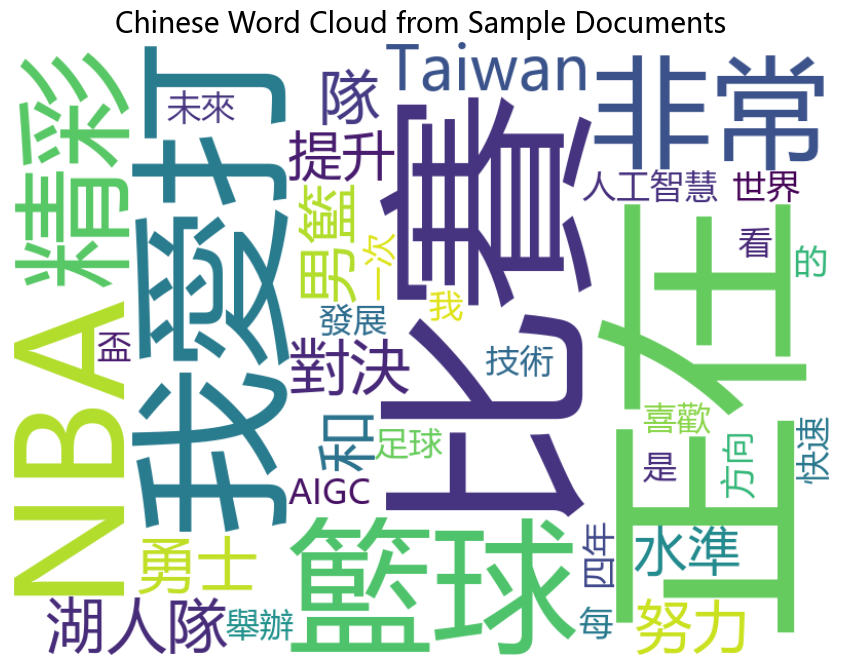

In [29]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your sample documents
docs = [
    "我愛打籃球，NBA比賽非常精彩，湖人隊和勇士隊對決。",
    "Taiwan男籃正在努力提升水準。",
    "人工智慧是未來的方向，AIGC技術正在快速發展。",
    "我喜歡看足球比賽，世界盃每四年舉辦一次。"
]

# Combine all documents into one string
text = " ".join(docs)

# Use jieba to segment Chinese text
seg_list = jieba.lcut(text)
seg_text = " ".join(seg_list)

# Generate word cloud
# Use a font that supports Chinese characters (e.g., Noto Sans CJK, SimHei, etc.)
# You may need to specify the path to a Chinese font on your system.
# For example, on Windows: 'msyh.ttc' (Microsoft YaHei)
# On macOS: '/System/Library/Fonts/PingFang.ttc'
# Or download and use 'NotoSansCJK-Regular.ttc'

wordcloud = WordCloud(
    font_path='msyh.ttc',  # Change this to a valid Chinese font path on your system
    width=800,
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(seg_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Chinese Word Cloud from Sample Documents", fontsize=20)
plt.show()

 正在預處理中文文本...
 文檔1: ['美國', '經濟', '持續', '增長', '金融', '市場', '穩定', '發展', '銀行', '利率', '下調', '促進', '消費']
 文檔2: ['美國', '總統', '大選', '臨近', '候選人紛', '紛發', '表演', '講爭', '取選民', '支持']
 文檔3: ['人工智慧', '技術', '快速', '發展', '深度', '學習', '圖像識別', '領域', '取得', '突破']
 文檔4: ['央行', '政策', '鼓勵', '中小', '企業', '貸款', '穩定', '就業', '市場']
 文檔5: ['科技', '公司', '推出', '新一代', '智慧', '手機', '搭載', 'AI', '晶片', '提升', '性能']
 文檔6: ['選舉', '投票率', '新高', '民眾', '積極', '民主', '進程']
 文檔7: ['金融', '科技', '結合', '大資料', '提升', '風險', '控制能力']
 文檔8: ['神經', '網路', '模型', '自然', '語言', '處理', '中表現', '優異']
 文檔9: ['政府', '推動', '綠色', '能源', '減少', '排放', '保護', '環境']
 文檔10: ['深度', '學習', '框架', 'PyTorch', 'TensorFlow', '廣受', '歡迎']

 正在構建詞典和語料...
 正在訓練LDA主題模型（3個主題）...
 LDA 主題模型訓練完成！

 主題表示 1：每個主題的關鍵字及其概率
 主題 0: 0.036*"市場" + 0.036*"穩定" + 0.021*"政策" + 0.021*"排放" + 0.021*"央行" + 0.021*"綠色" + 0.021*"就業" + 0.021*"金融" + 0.021*"減少" + 0.021*"保護"
 主題 1: 0.042*"科技" + 0.042*"提升" + 0.024*"美國" + 0.024*"金融" + 0.024*"大選" + 0.024*"臨近" + 0.024*"支持" + 0.024*"總統" + 0.024*"講爭" + 0.024*"候選人紛"
 主題

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

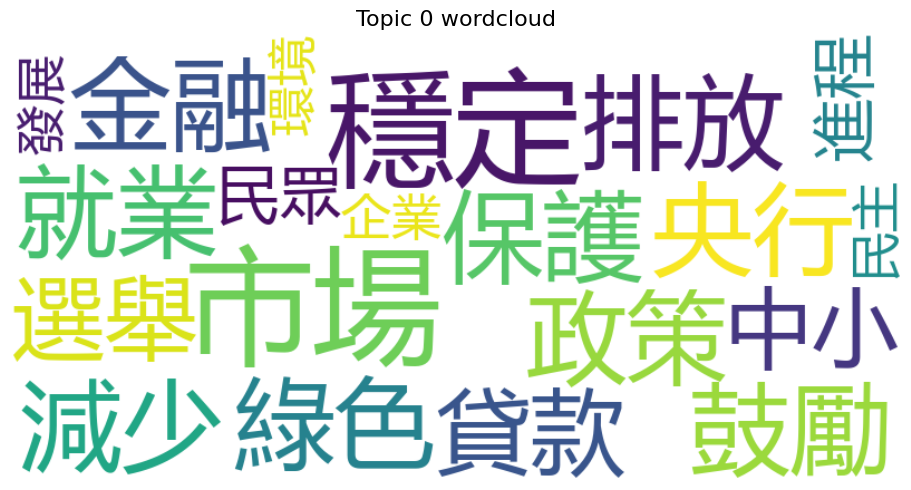

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

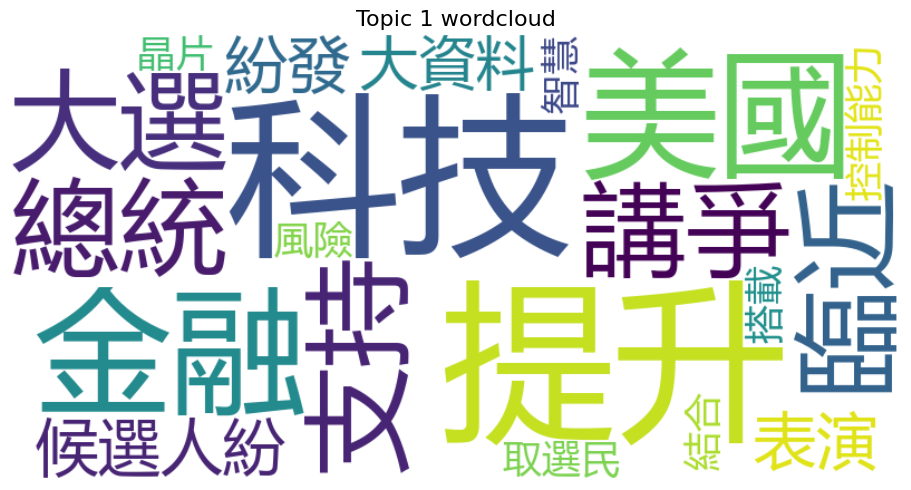

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

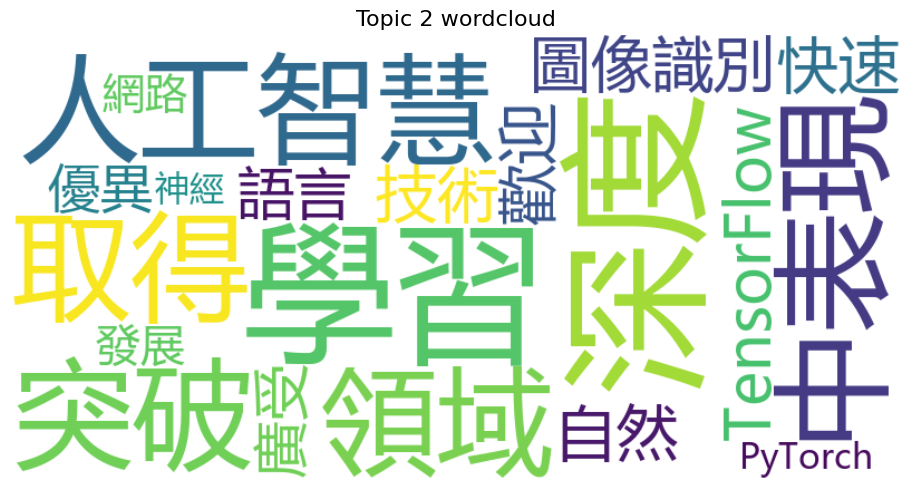


 主題表示 4：每篇文檔的主題分佈（概率表）
       主題_0   主題_1   主題_2
文檔1   0.989  0.000  0.000
文檔2   0.000  0.984  0.000
文檔3   0.000  0.000  0.984
文檔4   0.985  0.000  0.000
文檔5   0.000  0.986  0.000
文檔6   0.980  0.000  0.000
文檔7   0.012  0.978  0.000
文檔8   0.011  0.000  0.981
文檔9   0.983  0.000  0.000
文檔10  0.012  0.000  0.978


In [ ]:
import jieba
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# ========================
# 1. 準備中文文本資料
# ========================
texts = [
    "美國經濟持續增長，金融市場穩定發展，銀行利率下調促進消費",
    "美國總統大選臨近，候選人紛紛發表演講爭取選民支持",
    "人工智慧技術快速發展，深度學習在圖像識別領域取得突破",
    "央行發佈新政策，鼓勵中小企業貸款，穩定就業市場",
    "科技公司推出新一代智慧手機，搭載AI晶片提升性能",
    "選舉投票率創新高，民眾積極參與民主進程",
    "金融科技結合大資料，提升風險控制能力",
    "神經網路模型在自然語言處理中表現優異",
    "政府推動綠色能源，減少碳排放保護環境",
    "深度學習框架如PyTorch和TensorFlow廣受歡迎"
]

# ========================
# 2. 中文預處理：分詞 + 去停用詞
# ========================
# 簡易中文停用詞表（實際專案建議使用完整停用詞表）
stop_words = set([
    '的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '一個', '上', '也', '很', '到',
    '說', '要', '去', '你', '會', '著', '沒有', '看', '好', '自己', '這', '那', '個', '之', '與', '及',
    '為', '對', '於', '並', '等', '後', '而', '以', '得', '地', '她', '他', '它', '們', '能', '又', '可',
    '從', '但', '還', '或', '即', '其', '已', '些', '下', '被', '給', '讓', '由', '向', '往', '把', '將'
])

def preprocess_chinese(texts):
    tokenized_texts = []
    for text in texts:
        words = jieba.lcut(text)
        filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
        tokenized_texts.append(filtered_words)
    return tokenized_texts

print(" 正在預處理中文文本...")
processed_texts = preprocess_chinese(texts)
for i, doc in enumerate(processed_texts):
    print(f" 文檔{i+1}: {doc}")

# ========================
# 3. 構建詞典 + 語料 + 訓練LDA模型
# ========================
print("\n 正在構建詞典和語料...")
dictionary = Dictionary(processed_texts)
dictionary.filter_extremes(no_below=1, no_above=0.8)  # 過濾極端詞
corpus = [dictionary.doc2bow(text) for text in processed_texts]

print("正在訓練LDA主題模型（3個主題）...")
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    passes=10,
    alpha='auto',
    eta='auto'
)

print(" LDA 主題模型訓練完成！")

# ========================
# 4. 主題表示 1：詞 + 概率分佈
# ========================
print("\n" + "="*50)
print(" 主題表示 1：每個主題的關鍵字及其概率")
print("="*50)
for idx, topic in lda_model.print_topics(-1):
    print(f" 主題 {idx}: {topic}")

# ========================
# 5. 主題表示 2：Top-N 關鍵字清單
# ========================
print("\n" + "="*50)
print(" 主題表示 2：每個主題的 Top 5 關鍵字（簡潔版）")
print("="*50)
for i in range(lda_model.num_topics):
    topic_words = [word for word, prob in lda_model.show_topic(i, topn=5)]
    print(f" 主題 {i}: {', '.join(topic_words)}")

# ========================
# 6. 主題表示 3：詞雲視覺化（每個主題）
# ========================
print("\n 正在生成詞雲圖...（請稍等）")

def plot_wordcloud_for_topic(topic_id, lda_model, dictionary, figsize=(10, 5)):
    word_dict = {}
    for word_id, prob in lda_model.get_topic_terms(topic_id, topn=20):
        word = dictionary[word_id]
        word_dict[word] = prob

    # 生成詞雲
    wordcloud = WordCloud(
            font_path='msyh.ttc',  # Windows 系統自帶
            width=800,
            height=400,
            background_color='white',
            colormap='viridis'
        ).generate_from_frequencies(word_dict)
    
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_id} wordcloud", fontsize=16)
    plt.tight_layout()
    plt.show()

# 為每個主題繪製詞雲
for i in range(lda_model.num_topics):
    plot_wordcloud_for_topic(i, lda_model, dictionary)

# ========================
# 7. 主題表示 4：文檔-主題分佈表
# ========================
print("\n" + "="*50)
print(" 主題表示 4：每篇文檔的主題分佈（概率表）")
print("="*50)

doc_topics_df = pd.DataFrame()
for i, doc_bow in enumerate(corpus):
    topic_probs = lda_model.get_document_topics(doc_bow, minimum_probability=0.01)
    probs_dict = {f"主題_{topic}": prob for topic, prob in topic_probs}
    doc_topics_df = pd.concat([doc_topics_df, pd.DataFrame([probs_dict])], ignore_index=True)

# 補全缺失列 + 設置索引
for col in [f"主題_{i}" for i in range(lda_model.num_topics)]:
    if col not in doc_topics_df.columns:
        doc_topics_df[col] = 0.0

doc_topics_df = doc_topics_df[[f"主題_{i}" for i in range(lda_model.num_topics)]].fillna(0)
doc_topics_df.index = [f"文檔{i+1}" for i in range(len(corpus))]
doc_topics_df = doc_topics_df.round(3)

print(doc_topics_df)

In [34]:
import numpy as np
import pandas as pd

# Positive words (partial list)
positive_words = {
    '好', '棒', '贊', '喜歡', '愛', '優秀', '精彩', '滿意', '推薦', '強',
    '太棒了', '非常好', '很不錯', '喜歡', '熱愛', '開心', '幸福', '成功'
}

# Negative words
negative_words = {
    '差', '爛', '討厭', '噁心', '糟糕', '失望', '差勁', '垃圾', '坑人', '難用',
    '不滿意', '很差', '不喜歡', '難過', '傷心', '失敗'
}

# Clean & Segment Text
import jieba

def clean_and_segment(text):
    import re
    # Keep only Chinese characters
    text = re.sub(r'[^\u4e00-\u9fa5]', '', text)
    words = jieba.lcut(text)
    return [w for w in words if len(w) > 0]

# Test
text = "這部電影太棒了，我非常喜歡！"
words = clean_and_segment(text)
print("Words:", words)

def get_sentiment_score(text, pos_words=positive_words, neg_words=negative_words):
    words = clean_and_segment(text)
    
    pos_count = sum(1 for w in words if w in pos_words)
    neg_count = sum(1 for w in words if w in neg_words)
    
    # Simple scoring
    if pos_count > neg_count:
        return "Positive", pos_count - neg_count
    elif neg_count > pos_count:
        return "Negative", neg_count - pos_count
    else:
        return "Neutral", 0

# Test
texts = [
    "這部電影太棒了，我非常喜歡！",
    "服務很差，餐廳環境也很差。",
    "今天天氣是陰天。",
    "產品不錯，但物流太慢了。"
]

print("Lexicon-Based Sentiment Analysis:")
for t in texts:
    sent, score = get_sentiment_score(t)
    print(f"'{t}' → {sent} (score: {score})")

Words: ['這部', '電影', '太棒了', '我', '非常', '喜歡']
Lexicon-Based Sentiment Analysis:
'這部電影太棒了，我非常喜歡！' → Positive (score: 2)
'服務很差，餐廳環境也很差。' → Negative (score: 1)
'今天天氣是陰天。' → Neutral (score: 0)
'產品不錯，但物流太慢了。' → Neutral (score: 0)


In [ ]:
# pip install snownlp
from snownlp import SnowNLP

def snownlp_sentiment(text):
    s = SnowNLP(text)
    prob = s.sentiments  # 0 = negative, 1 = positive
    return "Positive" if prob > 0.6 else "Negative" if prob < 0.4 else "Neutral", round(prob, 3)

print("\nSnowNLP Sentiment:")
texts = [
    "這部電影太棒了，我非常喜歡！",
    "服務很差，餐廳環境也很差。",
    "今天天氣是陰天。",
    "產品不錯，但物流太慢了。"
]

for t in texts:
    sent, prob = snownlp_sentiment(t)
    print(f"'{t}' → {sent} (score: {prob})")
    
reviews = [
    "手機很好用，拍照清晰，運行流暢。",
    "電池續航太差了，一天要充三次電。",
    "外觀漂亮，但系統卡頓嚴重。",
    "性價比很高，推薦購買！",
    "客服態度差，售後不解決問題。"
]
print("\nProduct Review Sentiment Analysis:")
for r in reviews:
    sentiment, probs = snownlp_sentiment(r)  # ← probs is a FLOAT
    print(f" {r}")
    print(f"   → {sentiment} (score: {probs})\n")  # ← Just print the float


SnowNLP Sentiment:
'這部電影太棒了，我非常喜歡！' → Positive (score: 0.981)
'服務很差，餐廳環境也很差。' → Neutral (score: 0.514)
'今天天氣是陰天。' → Neutral (score: 0.456)
'產品不錯，但物流太慢了。' → Neutral (score: 0.514)

Product Review Sentiment Analysis:
 手機很好用，拍照清晰，運行流暢。
   → Positive (score: 0.779)

 電池續航太差了，一天要充三次電。
   → Negative (score: 0.058)

 外觀漂亮，但系統卡頓嚴重。
   → Neutral (score: 0.452)

 性價比很高，推薦購買！
   → Positive (score: 0.836)

 客服態度差，售後不解決問題。
   → Negative (score: 0.0)



In [38]:
import jieba
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import re

# ==============================
# 1. 準備中文標註數據集 (模擬電商評論)
# ==============================
data = [
    ("這款手機太棒了，拍照非常清晰，電池也很耐用", "positive"),
    ("客服態度極差，等了半天也沒人回覆", "negative"),
    ("物流很快，包裝完好，非常滿意", "positive"),
    ("質量很差，用了一個星期就壞了", "negative"),
    ("性價比超高，功能齊全，推薦購買", "positive"),
    ("螢幕有壞點，退貨流程麻煩", "negative"),
    ("系統流暢，外觀漂亮，物超所值", "positive"),
    ("充電器是假貨，商家不承認", "negative"),
    ("音質出色，續航給力，值得入手", "positive"),
    ("客服不理人，售後推卸責任", "negative"),
    ("運行速度快，遊戲無壓力", "positive"),
    ("收到貨發現是二手翻新機", "negative"),
    ("贈品豐富，服務周到", "positive"),
    ("宣傳與實物嚴重不符", "negative"),
    ("手感好，顏值高，朋友都說好看", "positive")
]

df = pd.DataFrame(data, columns=['text', 'label'])
print(" 原始數據樣本：")
print(df.head(10))

# ==============================
# 2. 中文文本預處理函數
# ==============================
def preprocess_chinese_text(text):
    # 去除標點、數字、特殊符號（保留中文、英文字母）
    text = re.sub(r'[^\u4e00-\u9fa5a-zA-Z]', ' ', text)
    # 使用 jieba 分詞
    words = jieba.lcut(text)
    # 過濾停用詞和單字
    stop_words = set(['的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '個', '上', '也', '很', '到', '說', '要', '去'])
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)  # 返回空格分隔的字串，供TF-IDF使用

# 應用預處理
df['cleaned_text'] = df['text'].apply(preprocess_chinese_text)

print("\n 預處理後的文本示例：")
for i in range(3):
    print(f"原文: {df.iloc[i]['text']}")
    print(f"處理後: {df.iloc[i]['cleaned_text']}\n")

# ==============================
# 3. 劃分訓練集和測試集
# ==============================
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f" 訓練集大小: {len(X_train)}, 測試集大小: {len(X_test)}")

# ==============================
# 4. 手動 TF-IDF 向量化（不使用 Pipeline）
# ==============================
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    token_pattern=r'(?u)\b\w+\b'
)

#  重要：只在訓練集上 fit
X_train_tfidf = vectorizer.fit_transform(X_train)
#  測試集只 transform，不 fit！
X_test_tfidf = vectorizer.transform(X_test)

print(f" 訓練集向量形狀: {X_train_tfidf.shape}")
print(f" 測試集向量形狀: {X_test_tfidf.shape}")

# ==============================
# 5. 訓練分類器（手動，不用 Pipeline）
# ==============================
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_tfidf, y_train)

print(" 模型訓練完成！")

# ==============================
# 6. 評估模型
# ==============================
y_pred = classifier.predict(X_test_tfidf)

print("\n 分類報告:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

print("\n 混淆矩陣:")
print(confusion_matrix(y_test, y_pred))

# ==============================
# 7. 預測新評論
# ==============================
new_comments = [
    "手機非常好用，強烈推薦！",
    "垃圾產品，客服也不管",
    "還行吧，沒什麼特別的",
    "物流慢，但產品質量不錯"
]

print("\n 新評論情感預測:")
for comment in new_comments:
    # 預處理
    cleaned = preprocess_chinese_text(comment)
    # 向量化（使用訓練好的 vectorizer）
    comment_vec = vectorizer.transform([cleaned])
    # 預測
    pred = classifier.predict(comment_vec)[0]
    prob = classifier.predict_proba(comment_vec)[0]
    confidence = max(prob)
    print(f"原文: {comment}")
    print(f"預測: {pred} (置信度: {confidence:.2f})\n")

# ==============================
# 8. 查看特徵重要性（哪些詞最影響分類）
# ==============================
def show_top_features(vectorizer, classifier, class_names=['negative', 'positive'], top_n=10):
    feature_names = vectorizer.get_feature_names_out()
    coef = classifier.coef_[0]  # binary classification

    top_negative = sorted(zip(coef, feature_names))[:top_n]
    top_positive = sorted(zip(coef, feature_names), reverse=True)[:top_n]

    print(f"\n 最具負面情感的詞 (Top {top_n}):")
    for coef_val, word in top_negative:
        print(f"  {word}: {coef_val:.3f}")

    print(f"\n 最具正面情感的詞 (Top {top_n}):")
    for coef_val, word in top_positive:
        print(f"  {word}: {coef_val:.3f}")

show_top_features(vectorizer, classifier)

 原始數據樣本：
                    text     label
0  這款手機太棒了，拍照非常清晰，電池也很耐用  positive
1       客服態度極差，等了半天也沒人回覆  negative
2         物流很快，包裝完好，非常滿意  positive
3         質量很差，用了一個星期就壞了  negative
4        性價比超高，功能齊全，推薦購買  positive
5           螢幕有壞點，退貨流程麻煩  negative
6         系統流暢，外觀漂亮，物超所值  positive
7           充電器是假貨，商家不承認  negative
8         音質出色，續航給力，值得入手  positive
9           客服不理人，售後推卸責任  negative

 預處理後的文本示例：
原文: 這款手機太棒了，拍照非常清晰，電池也很耐用
處理後: 這款 手機 太棒了 拍照 非常 清晰 電池 耐用

原文: 客服態度極差，等了半天也沒人回覆
處理後: 客服 態度 極差 半天 沒人 回覆

原文: 物流很快，包裝完好，非常滿意
處理後: 物流 很快 包裝 完好 非常 滿意

 訓練集大小: 10, 測試集大小: 5
 訓練集向量形狀: (10, 87)
 測試集向量形狀: (5, 87)
 模型訓練完成！

 分類報告:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5


 混淆矩陣:
[[0 2]
 [0 3]]

 新評論情感預測:
原文: 手機非常好用，強

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag